# Persoalan 5.B
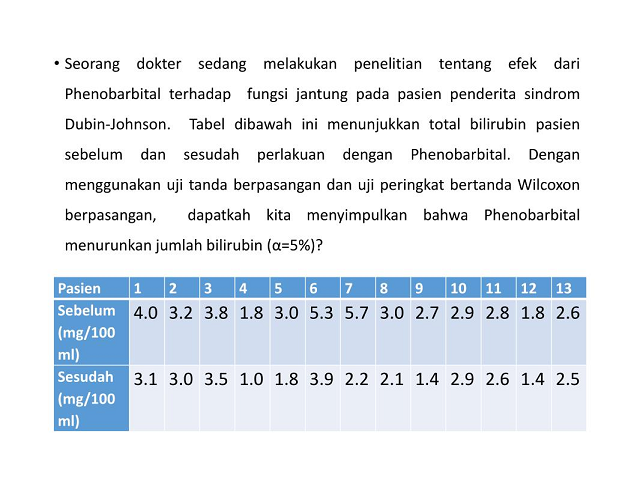


# Solusi

## 1. Normality Tests

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("Dokter.csv")
print("The rows and columns are",df.shape)
df.head(13)

The rows and columns are (13, 3)


,pasien,sebelum,sesudah
0,1,4.0,3.1
1,2,3.2,3.0
2,3,3.8,3.5
3,4,1.8,1.0
4,5,3.0,1.8
5,6,5.3,3.9
6,7,5.7,2.2
7,8,3.0,2.1
8,9,2.7,1.4
9,10,2.9,2.9


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   pasien   13 non-null     int64  
 1   sebelum  13 non-null     float64
 2   sesudah  13 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 440.0 bytes


In [52]:
df.isna().sum()

pasien     0
sebelum    0
sesudah    0
dtype: int64

## Histogram Plot

In [53]:
df1=df.drop(columns="pasien")

Text(0.5, 0.98, 'Plot Histogram untuk semua Variabel Numerik')

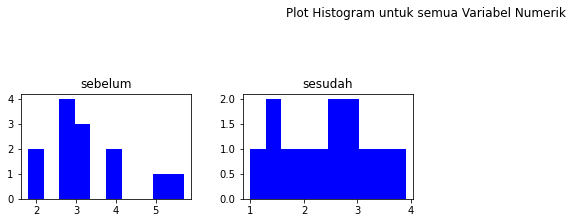

In [54]:
df1.hist(layout=(5,4),color='blue', figsize=(15,12), grid=False)
plt.suptitle("Plot Histogram untuk semua Variabel Numerik")

## Q-Q Plot

QQ dari kolom: sebelum


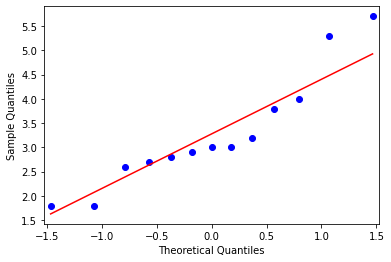

QQ dari kolom: sesudah


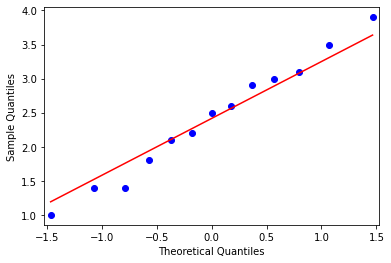

In [55]:
import statsmodels.api as sm
import pylab

for i, val in enumerate(df1):
    print('QQ dari kolom:', val)
    sm.qqplot(df[val], line='s')
    plt.show()

In [56]:
df2=df1.drop(columns="sesudah")

## Box Plot

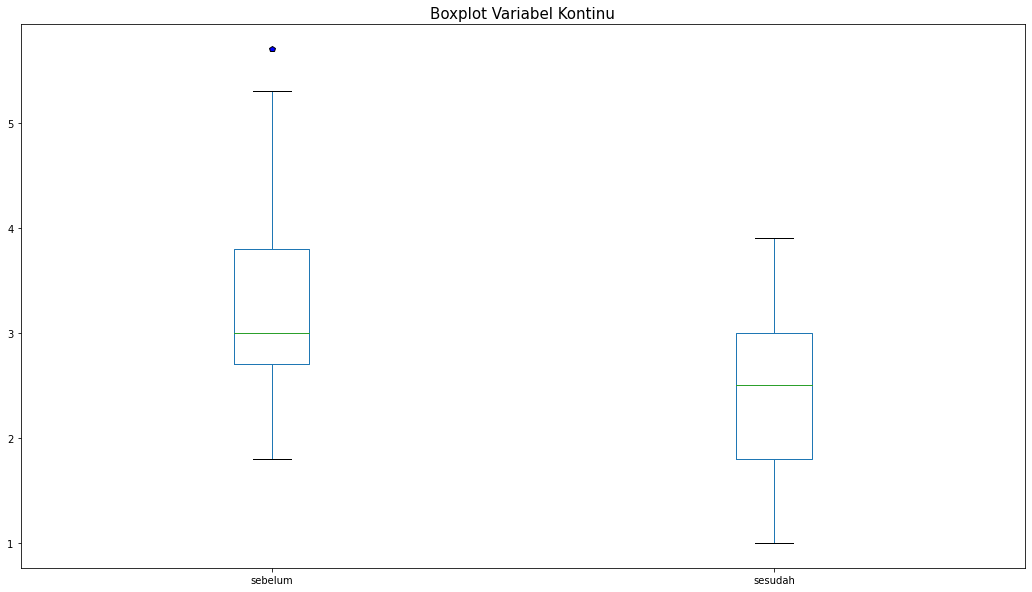

In [57]:
bit = dict(markerfacecolor='b', marker='p')
boxplot = df1.boxplot(figsize=(18,10), grid=False, flierprops=bit)
plt.title('Boxplot Variabel Kontinu', fontsize=15);

Menguji apakah sampel berbeda dari distribusi normal.

Berikut Beberapa Fungsi Statistik untuk menguji hipotesis nol bahwa sampel berasal dari distribusi normal atau tidak. 

## Statistical Tests



In [58]:
from scipy import stats
k2, p = stats.normaltest(df1)
alpha = 0.05
columns=df1.columns
columns

Index(['sebelum', 'sesudah'], dtype='object')

### Kolmogorov–Smirnov test (acuan)

In [59]:
for i in columns:
    print ([i])
    a,b= stats.kstest(df1[[i]],'norm', alternative='greater')
    print ("Statistics", a, "p-value", b)
    if b < alpha:  
        print("H0 ditolak (tidak normal)")
    else:
        print("H0 diterima (normal)")

['sebelum']
Statistics 0.03593031911292577 p-value 0.9451182941073295
H0 diterima (normal)
['sesudah']
Statistics 0.15865525393145707 p-value 0.47098024606710365
H0 diterima (normal)


### Shapiro-Wilk Test

In [60]:
for i in columns:
    print ([i])
    a,b= stats.shapiro(df1[[i]])
    print ("Statistics", a, "p-value", b)
    if b < alpha:  
        print("H0 ditolak (tidak normal)")
    else:
        print("H0 diterima (normal)")

['sebelum']
Statistics 0.8914250731468201 p-value 0.10202369838953018
H0 diterima (normal)
['sesudah']
Statistics 0.9782854914665222 p-value 0.9701361060142517
H0 diterima (normal)


### D'Agostino's K-squared test

In [61]:
for i in columns:
    print ([i])
    a,b= stats.normaltest(df1[[i]])
    print (a, b)
    if b < alpha:  
        print("H0 ditolak (tidak normal)")
    else:
        print("H0 diterima (normal)")

['sebelum']
[3.03314069] [0.21946328]
H0 diterima (normal)
['sesudah']
[0.40999285] [0.81465023]
H0 diterima (normal)


### Jarque–Bera test

In [62]:
for i in columns:
    print ([i])
    a,b= stats.jarque_bera(df1[[i]])
    print ("Statistics", a, "p-value", b)
    if b < alpha:  
        print("H0 ditolak (tidak normal)")
    else:
        print("H0 diterima (normal)")

['sebelum']
Statistics 1.598191122154672 p-value 0.44973553855460746
H0 diterima (normal)
['sesudah']
Statistics 0.48980148332425794 p-value 0.7827822320491934
H0 diterima (normal)


## 2. Uji Wilcoxon signed-rank 

In [63]:
# !pip install scipy
from scipy.stats import wilcoxon
# pip install PyNonpar
from researchpy import ttest
# pip install pingouin --upgrade
from pingouin import wilcoxon as pgWilc



In [64]:
newDf = df1[['sebelum', 'sesudah']].dropna()
p=wilcoxon(newDf['sebelum'], newDf['sesudah'], correction=False)
print("Pvalue : " ,p.pvalue)
if p.pvalue < alpha :
    print("H0 ditolak (sehingga disimpulkan bahwa phenobarbital menurunkan jumlah bilirubin (a=5%))")
else:
    print("H0 diterima (sehingga disimpulkan bahwa phenobarbital tidak menurunkan jumlah bilirubin (a=5%))")

Pvalue :  0.0022090203462313877
H0 ditolak (sehingga disimpulkan bahwa phenobarbital menurunkan jumlah bilirubin (a=5%))


#### !*correction=False* menghindari scipy yang menggunakan koreksi kontinuitas. Jika ingin menggunakan ini, bisa mengaturnya ke true:

In [65]:
rpRes = ttest(newDf['sebelum'], newDf['sesudah'], equal_variances=False, paired=True)
rpRes



,Wilcoxon signed-rank test,results
0,Mean for sebelum =,3.276923
1,Mean for sesudah =,2.415385
2,W value =,0.000000
3,Z value =,-3.059400
4,Two sided p value =,0.002500
5,r =,-0.600000


In [66]:
pgWilc(newDf['sebelum'], newDf['sesudah'])

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,0.002516,1.0,0.710059


In [67]:
p=wilcoxon(newDf['sebelum'], newDf['sesudah'], correction=True)
print("Pvalue : " ,p.pvalue)

if p.pvalue < alpha :
    print("H0 ditolak (sehingga disimpulkan bahwa phenobarbital menurunkan jumlah bilirubin (a=5%))")
else:
    print("H0 diterima (sehingga disimpulkan bahwa phenobarbital tidak menurunkan jumlah bilirubin (a=5%))")

Pvalue :  0.0025164965638415056
H0 ditolak (sehingga disimpulkan bahwa phenobarbital menurunkan jumlah bilirubin (a=5%))


In [68]:
p=wilcoxon(newDf['sebelum'], newDf['sesudah'], zero_method='pratt')
print("Pvalue : " ,p.pvalue)

if p.pvalue < alpha :
    print("H0 ditolak (sehingga disimpulkan bahwa phenobarbital menurunkan jumlah bilirubin (a=5%))")
else:
    print("H0 diterima (sehingga disimpulkan bahwa phenobarbital tidak menurunkan jumlah bilirubin (a=5%))")

Pvalue :  0.0016453888696940399
H0 ditolak (sehingga disimpulkan bahwa phenobarbital menurunkan jumlah bilirubin (a=5%))
